### Welcome to my first project and experience with Python. Warning: I am not sure I understand the task clearly, but I will do my best to not make you being disappointed.

First of all, let's load our libraries:

In [ ]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Then let's upload our datasets borrowed from kaggle.com .
I am going to use a dataset from Association of Tennis Professionals Matches including individual statistics from 2003 year till 2004. I have done some changes for making our calculating better - I have put columns for losers below columns of winners and added a new column called "win" which indicates the winner with 1 and the loser with 0. So, the first one dataset is "original" and will be shown only to compare with the new one.

In [ ]:
data_2003 = pd.read_csv('atp_matches_2003_redone(1).csv')
data_2004 = pd.read_csv('atp_matches_2004_redone(1).csv')
data_original_2004 = pd.read_csv('atp_matches_2004.csv')
data_original_2003 = pd.read_csv('atp_matches_2003.csv')
data_original = pd.concat([data_original_2004, data_original_2003])
data = pd.concat([data_2004, data_2003])

Below you can look at some peices of information towards these datasets.
if you need more, please, visit this [link.](https://www.kaggle.com/datasets/gmadevs/atp-matches-dataset?resource=download&select=atp_matches_2004.csv)

In [ ]:
display(data_original.shape)
display(data_original.head())
display(data.head())
display(data.shape)
display(data.info())
display(data.describe())
display(data.nunique()) # the number of unique variables, by default ingnoring NaN

(6491, 49)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2004-360,Casablanca,Clay,32,A,20040517,1,103103,1.0,NaN,...,6.0,1.0,4.0,63.0,28.0,17.0,15.0,8.0,5.0,9.0
1,2004-360,Casablanca,Clay,32,A,20040517,2,102231,NaN,NaN,...,11.0,5.0,7.0,97.0,59.0,35.0,14.0,15.0,6.0,13.0
2,2004-360,Casablanca,Clay,32,A,20040517,3,103700,NaN,NaN,...,3.0,0.0,5.0,52.0,23.0,15.0,7.0,8.0,3.0,8.0
3,2004-360,Casablanca,Clay,32,A,20040517,4,103169,8.0,NaN,...,4.0,4.0,6.0,87.0,36.0,25.0,23.0,10.0,17.0,20.0
4,2004-360,Casablanca,Clay,32,A,20040517,5,103898,NaN,NaN,...,7.0,2.0,6.0,68.0,33.0,20.0,16.0,9.0,4.0,8.0


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,won
0,2004-360,Casablanca,Clay,32,A,20040517,1,103103,1.0,NaN,...,4.0,1.0,56.0,32.0,27.0,11.0,8.0,6.0,6.0,1
1,2004-360,Casablanca,Clay,32,A,20040517,2,102231,NaN,NaN,...,4.0,4.0,83.0,59.0,33.0,12.0,14.0,6.0,11.0,1
2,2004-360,Casablanca,Clay,32,A,20040517,3,103700,NaN,NaN,...,0.0,2.0,50.0,26.0,20.0,13.0,7.0,3.0,3.0,1
3,2004-360,Casablanca,Clay,32,A,20040517,4,103169,8.0,NaN,...,0.0,4.0,60.0,39.0,27.0,13.0,10.0,3.0,4.0,1
4,2004-360,Casablanca,Clay,32,A,20040517,5,103898,NaN,NaN,...,1.0,5.0,73.0,43.0,29.0,16.0,9.0,6.0,7.0,1


(12982, 31)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12982 entries, 0 to 6427
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          12982 non-null  object 
 1   tourney_name        12982 non-null  object 
 2   surface             12982 non-null  object 
 3   draw_size           12982 non-null  int64  
 4   tourney_level       12982 non-null  object 
 5   tourney_date        12982 non-null  int64  
 6   match_num           12982 non-null  int64  
 7   winner_id           12982 non-null  int64  
 8   winner_seed         3925 non-null   float64
 9   winner_entry        2044 non-null   object 
 10  winner_name         12982 non-null  object 
 11  winner_hand         12982 non-null  object 
 12  winner_ht           12375 non-null  float64
 13  winner_ioc          12982 non-null  object 
 14  winner_age          12974 non-null  float64
 15  winner_rank         12379 non-null  float64
 16  winne

None

,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,winner_rank,winner_rank_points,best_of,...,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,won
count,12982.000000,1.298200e+04,12982.000000,12982.000000,3925.000000,12375.000000,12974.000000,12379.000000,12379.000000,12982.000000,...,11378.000000,11378.000000,11378.000000,11378.000000,11378.000000,11378.000000,11378.000000,11378.000000,11378.000000,12982.000000
mean,53.181328,2.003549e+07,26.529348,103304.510476,7.851465,184.691071,25.251924,105.884482,903.438161,3.463411,...,5.720162,3.241255,78.338109,46.967481,33.251011,15.782827,12.217789,4.067499,6.844085,0.500000
std,37.741227,5.260347e+03,26.440909,900.361333,7.027404,6.495563,3.529655,168.380567,898.124552,0.843876,...,5.134467,2.522236,28.973767,18.746389,13.701193,7.185927,4.174243,3.188438,4.471540,0.500019
min,4.000000,2.002123e+07,1.000000,101316.000000,1.000000,168.000000,14.757016,1.000000,1.000000,3.000000,...,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,2.003061e+07,8.000000,102780.000000,3.000000,180.000000,22.450376,27.000000,375.000000,3.000000,...,2.000000,1.000000,57.000000,34.000000,24.000000,11.000000,9.000000,2.000000,3.000000,0.000000
50%,32.000000,2.004010e+07,20.000000,103292.000000,6.000000,185.000000,25.054073,61.000000,637.000000,3.000000,...,4.000000,3.000000,73.000000,44.000000,31.000000,15.000000,11.000000,4.000000,6.000000,0.500000
75%,64.000000,2.004061e+07,32.000000,103813.000000,10.000000,188.000000,27.687885,107.000000,1100.000000,3.000000,...,8.000000,5.000000,95.000000,57.000000,41.000000,20.000000,15.000000,6.000000,9.000000,1.000000
max,128.000000,2.004120e+07,127.000000,108928.000000,35.000000,208.000000,37.305955,1445.000000,6760.000000,5.000000,...,46.000000,20.000000,253.000000,179.000000,141.000000,61.000000,41.000000,22.000000,34.000000,1.000000


tourney_id             302
tourney_name           235
surface                  4
draw_size                8
tourney_level            5
tourney_date            86
match_num              127
winner_id              685
winner_seed             34
winner_entry             3
winner_name            685
winner_hand              3
winner_ht               16
winner_ioc              87
winner_age            3827
winner_rank            693
winner_rank_points    1367
score                 2225
best_of                  2
round                    9
minutes                245
w_ace                   42
w_df                    19
w_svpt                 205
w_1stIn                141
w_1stWon               101
w_2ndWon                56
w_SvGms                 38
w_bpSaved               23
w_bpFaced               32
won                      2
dtype: int64

Okay, that's pretty boring, but still thanks to this information it's easier **to predict** the results of future games and, maybe, even thier **winners**.
But coming back to reality, we need to reduce the amount of useless columns, because I doubt this project requires all these 49 pieces. Let's look if there are some columns that have more than a half of missing values:

In [ ]:
data = data.replace('?', np.nan)
data.isnull().sum(axis=0)

tourney_id                0
tourney_name              0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed            9057
winner_entry          10938
winner_name               0
winner_hand               0
winner_ht               607
winner_ioc                0
winner_age                8
winner_rank             603
winner_rank_points      603
score                     0
best_of                   0
round                     0
minutes                1518
w_ace                  1604
w_df                   1604
w_svpt                 1604
w_1stIn                1604
w_1stWon               1604
w_2ndWon               1604
w_SvGms                1604
w_bpSaved              1604
w_bpFaced              1604
won                       0
dtype: int64

Oooh, there are TOP-2 "winners" of nomination to be deleted due to the amount of misiing values and also 10 candidates to repeat this fate.

In [ ]:
data.drop(columns=['winner_seed', 'winner_entry'], inplace=True)
data.isnull().sum(axis=0)

tourney_id               0
tourney_name             0
surface                  0
draw_size                0
tourney_level            0
tourney_date             0
match_num                0
winner_id                0
winner_name              0
winner_hand              0
winner_ht              607
winner_ioc               0
winner_age               8
winner_rank            603
winner_rank_points     603
score                    0
best_of                  0
round                    0
minutes               1518
w_ace                 1604
w_df                  1604
w_svpt                1604
w_1stIn               1604
w_1stWon              1604
w_2ndWon              1604
w_SvGms               1604
w_bpSaved             1604
w_bpFaced             1604
won                      0
dtype: int64

Do we really need to know the name or the id of tourney to predict the winner? I do not think so. I have not ever seen a tennis player who would give up only because of an awful name or an unfitted date of a tourney. But, on the other side, player's height or rank can be quite important. Also I would like to keep the level and the surface where the game could be played cause these parameters would influence the results. Towards rounds and score: we have ranks that are made within data from that, so, it is like a duplicite value and I recommend to get rid of it for simplifying the calculating process. Let's keep only usefull columns:

In [ ]:
data.drop(columns=['tourney_id', 'tourney_name', 'tourney_date', 'winner_ioc', 'score', 'round'], inplace=True)

In [ ]:
data["winner_ht"] = data["winner_ht"].fillna(data["winner_ht"].median())
data["winner_age"] = data["winner_age"].fillna(data["winner_age"].median())
data["winner_rank"] = data["winner_rank"].fillna(data["winner_rank"].median())
data["winner_rank_points"] = data["winner_rank_points"].fillna(data["winner_rank_points"].median())
data["minutes"] = data["minutes"].fillna(data["minutes"].median())
data["w_ace"] = data["w_ace"].fillna(data["w_ace"].median())
data["w_df"] = data["w_df"].fillna(data["w_df"].median())
data["w_svpt"] = data["w_svpt"].fillna(data["w_svpt"].median())
data["w_1stIn"] = data["w_1stIn"].fillna(data["w_1stIn"].median())
data["w_1stWon"] = data["w_1stWon"].fillna(data["w_1stWon"].median())
data["w_2ndWon"] = data["w_2ndWon"].fillna(data["w_2ndWon"].median())
data["w_SvGms"] = data["w_SvGms"].fillna(data["w_SvGms"].median())
data["w_bpSaved"] = data["w_bpSaved"].fillna(data["w_bpSaved"].median())
data["w_bpFaced"] = data["w_bpFaced"].fillna(data["w_bpFaced"].median())
data.isnull().sum(axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12982 entries, 0 to 6427
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   surface             12982 non-null  object 
 1   draw_size           12982 non-null  int64  
 2   tourney_level       12982 non-null  object 
 3   match_num           12982 non-null  int64  
 4   winner_id           12982 non-null  int64  
 5   winner_name         12982 non-null  object 
 6   winner_hand         12982 non-null  object 
 7   winner_ht           12982 non-null  float64
 8   winner_age          12982 non-null  float64
 9   winner_rank         12982 non-null  float64
 10  winner_rank_points  12982 non-null  float64
 11  best_of             12982 non-null  int64  
 12  minutes             12982 non-null  float64
 13  w_ace               12982 non-null  float64
 14  w_df                12982 non-null  float64
 15  w_svpt              12982 non-null  float64
 16  w_1st

Now what we are going to do is preparing od data for a desicion tree. As this tree works only with numbers, we have to replace objects' types with their number equivalents.
Firts of all, let's display our columns to change:

In [ ]:
columns_to_change = data.select_dtypes(['object']).columns
print(columns_to_change)

Index(['surface', 'tourney_level', 'winner_name', 'winner_hand'], dtype='object')


In [ ]:
data[columns_to_change].nunique()

surface            4
tourney_level      5
winner_name      685
winner_hand        3
dtype: int64

As we can see, the biggest problem will be with replacing names of the players. But just think a little bit about its importance: does the name inluences the results? Maybe, if you know this player, you will place a bet, and now we are discussing the winners, not some business purposes. So, I am going to delete names due to their low importance level in comparison with the otherts parameters:

In [ ]:
data.drop(columns=['winner_name'], inplace=True)

In [ ]:
data['winner_hand'].unique()

array(['R', 'L', 'U'], dtype=object)

In [ ]:
data = pd.get_dummies(
    data=data,
    columns=['winner_hand'],
    prefix=["hand_"]
)

In [ ]:
data['surface'].unique()

array(['Clay', 'Grass', 'Carpet', 'Hard'], dtype=object)

In [ ]:
data['surface']=data.surface.replace({
    "Clay" : 1,
    "Grass" : 3,
    "Carpet" : 2,
    "Hard" : 4
})

In [ ]:
data['tourney_level'].unique()

array(['A', 'M', 'G', 'F', 'D'], dtype=object)

In [ ]:
data = pd.get_dummies(
    data=data,
    columns=['tourney_level']
)

This diagram shows the dependencies between winning and winner's height:

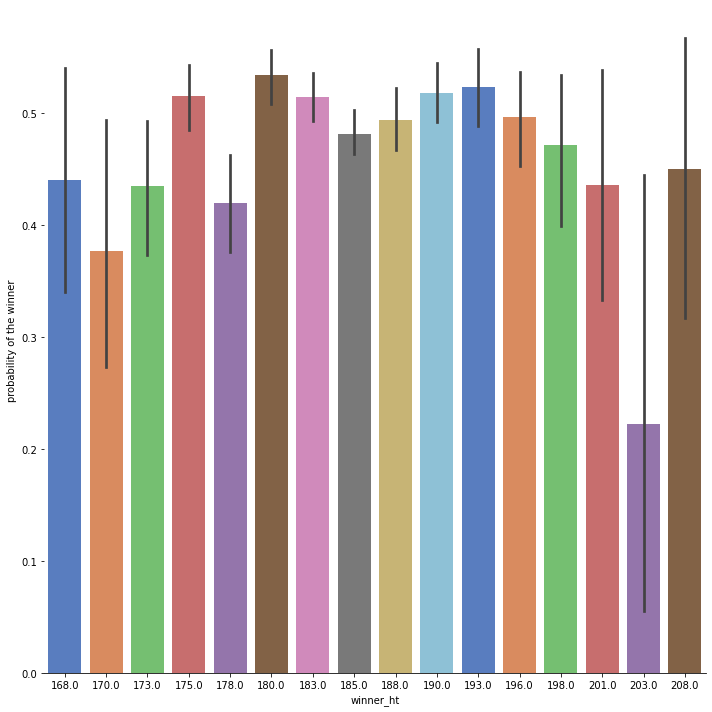

In [ ]:
g = sns.factorplot(x="winner_ht",y="won",data=data,kind="bar", size = 10 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("probability of the winner")

Do you see any differences? Cause I do not. It is more about average height between people than about opportunities to win depend on height.

Same as left, right and both hands preferences. They do not influence the results that much.

In [ ]:
data[["hand__L","hand__R", "hand__U", "won"]].groupby('won').mean()

,hand__L,hand__R,hand__U
won,,,
0,0.115853,0.851641,0.032507
1,0.102141,0.883069,0.014790


Purely theoretically, looking at the graph, we can say that people playing with the right hand have a greater chance of winning, because their percentage of winnings exceeds the percentage of losses, unlike the left and both.

Who also thinks the age is important in professional sports? I'll show you that younger players are better than experienced:

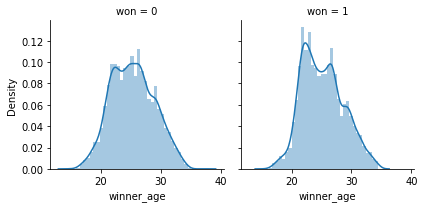

In [ ]:
g = sns.FacetGrid(data, col='won')
g = g.map(sns.distplot, "winner_age")

Great part of the winning is player's serve. Let's see, how many times did winners and losers make a double fault during their serve:

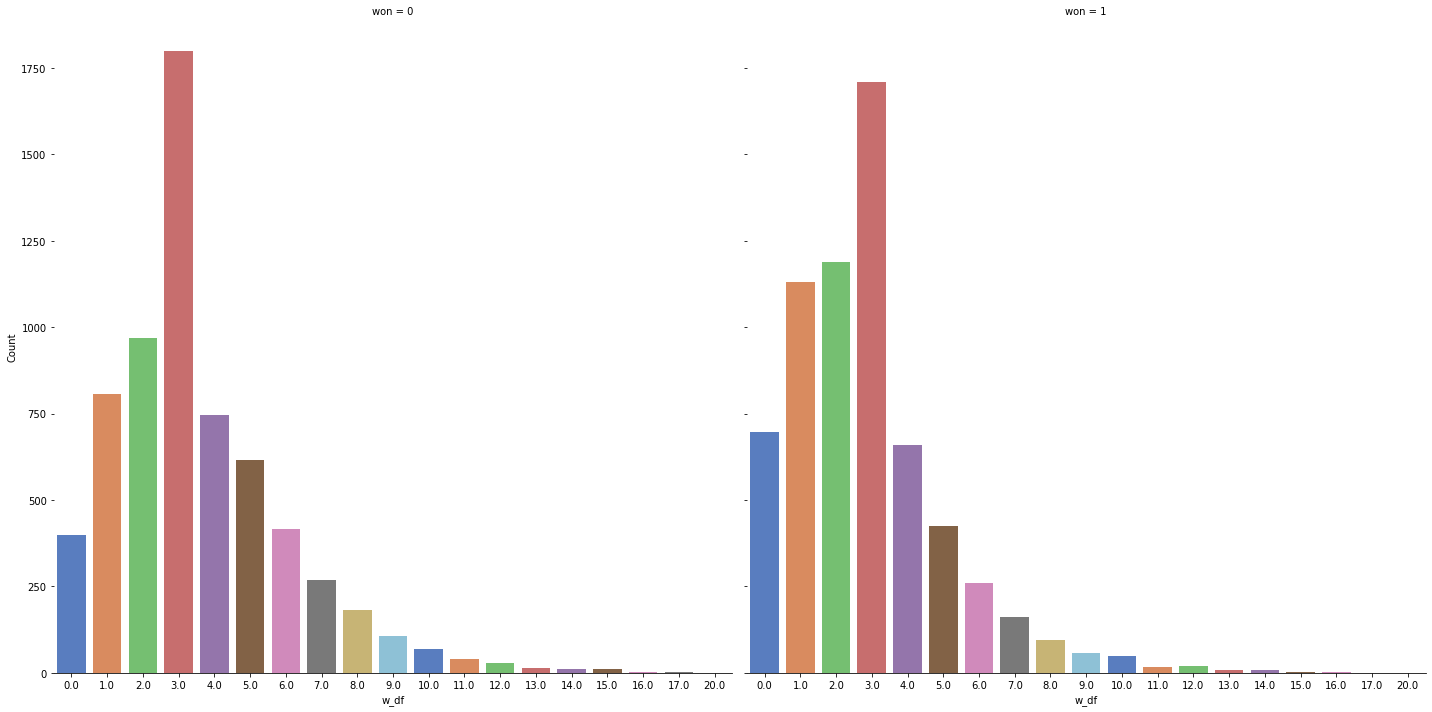

In [ ]:
g = sns.factorplot("w_df", col="won",  data=data,
                   size=10, kind="count", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Count")

Yeah, these statistics did not make me being dissapointed, cause we see: the more mistakes we make - the more we loose © Life

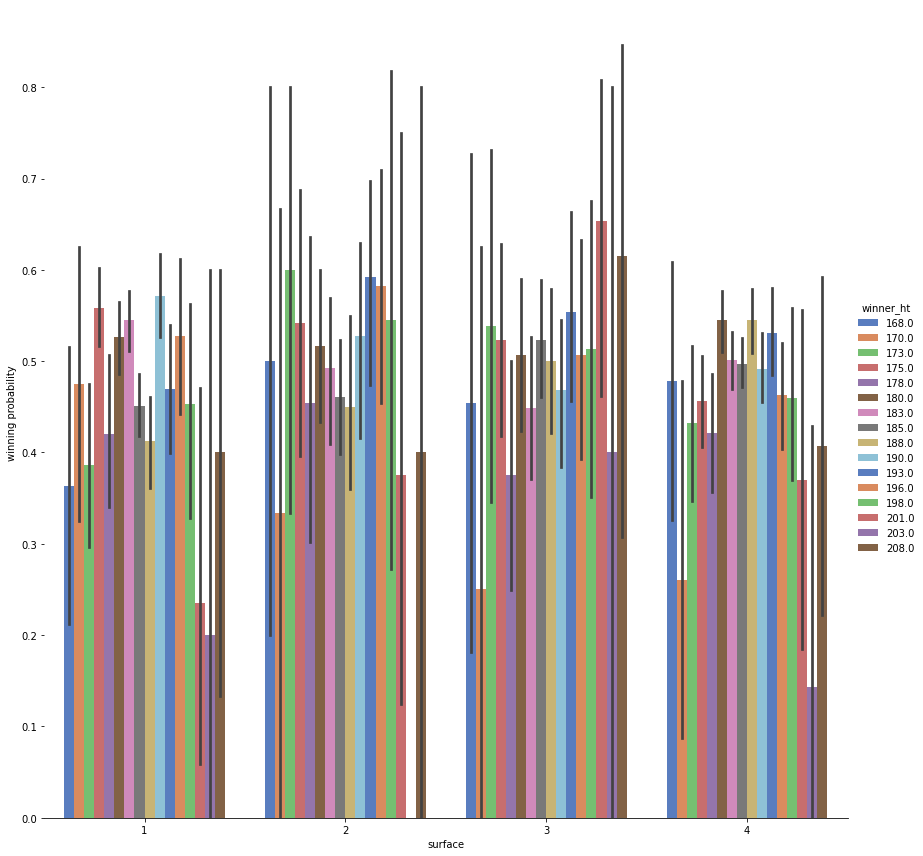

In [ ]:
g = sns.factorplot(x="surface", y="won", hue="winner_ht", data=data,
                   size=12, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("winning probability")

I really cannot explain why do players with 170 cm height have low chances to win. But, maybe, I was wrong complaining towards heights influence.

One more diagram to find out how many winnings thanks to successful serve were:

[Text(0, 0, '0.0'),
 Text(1, 0, '1.0'),
 Text(2, 0, '2.0'),
 Text(3, 0, '3.0'),
 Text(4, 0, '4.0'),
 Text(5, 0, '5.0'),
 Text(6, 0, '6.0'),
 Text(7, 0, '7.0'),
 Text(8, 0, '8.0'),
 Text(9, 0, '9.0'),
 Text(10, 0, '10.0'),
 Text(11, 0, '11.0'),
 Text(12, 0, '12.0'),
 Text(13, 0, '13.0'),
 Text(14, 0, '14.0'),
 Text(15, 0, '15.0'),
 Text(16, 0, '16.0'),
 Text(17, 0, '17.0'),
 Text(18, 0, '18.0'),
 Text(19, 0, '19.0'),
 Text(20, 0, '20.0'),
 Text(21, 0, '21.0'),
 Text(22, 0, '22.0'),
 Text(23, 0, '23.0'),
 Text(24, 0, '24.0'),
 Text(25, 0, '25.0'),
 Text(26, 0, '26.0'),
 Text(27, 0, '27.0'),
 Text(28, 0, '28.0'),
 Text(29, 0, '29.0'),
 Text(30, 0, '30.0'),
 Text(31, 0, '31.0'),
 Text(32, 0, '32.0'),
 Text(33, 0, '33.0'),
 Text(34, 0, '34.0'),
 Text(35, 0, '35.0'),
 Text(36, 0, '37.0'),
 Text(37, 0, '38.0'),
 Text(38, 0, '39.0'),
 Text(39, 0, '40.0'),
 Text(40, 0, '41.0'),
 Text(41, 0, '46.0')]

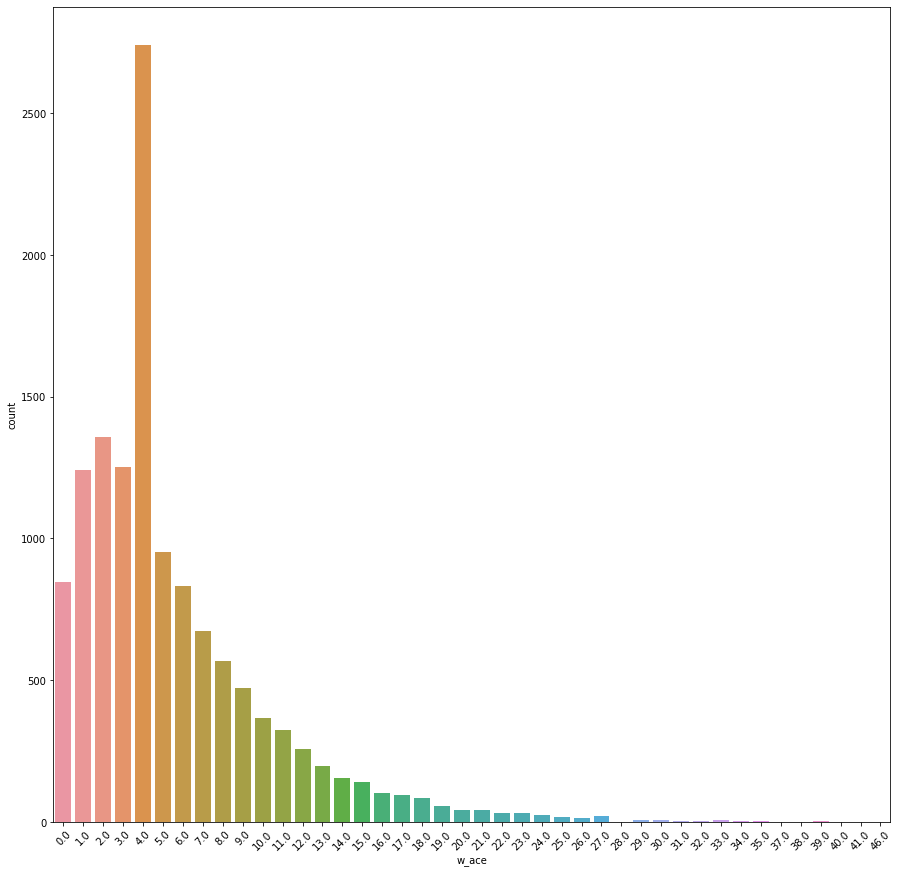

In [ ]:
plt.figure(figsize=(15,15))
fig = sns.countplot(x="w_ace",data=data)
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

<AxesSubplot:>

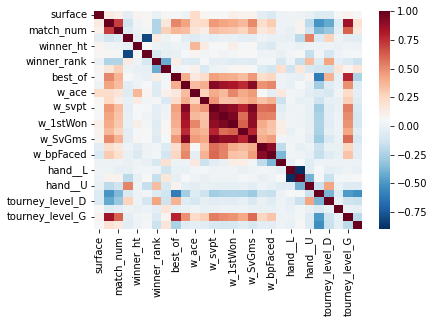

In [ ]:
sns.heatmap(data.corr(), annot=False,cmap='RdBu_r')

Now I prefer moving to the most entertaining part - prediction of the winner depend on their and their game's parameters. But, first of all, I have to change the order of these columns:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12982 entries, 0 to 6427
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   surface             12982 non-null  int64  
 1   draw_size           12982 non-null  int64  
 2   match_num           12982 non-null  int64  
 3   winner_id           12982 non-null  int64  
 4   winner_ht           12982 non-null  float64
 5   winner_age          12982 non-null  float64
 6   winner_rank         12982 non-null  float64
 7   winner_rank_points  12982 non-null  float64
 8   best_of             12982 non-null  int64  
 9   minutes             12982 non-null  float64
 10  w_ace               12982 non-null  float64
 11  w_df                12982 non-null  float64
 12  w_svpt              12982 non-null  float64
 13  w_1stIn             12982 non-null  float64
 14  w_1stWon            12982 non-null  float64
 15  w_2ndWon            12982 non-null  float64
 16  w_SvG

In [ ]:
data = data[['surface', 'draw_size', 'match_num', 'winner_ht','winner_age', 'winner_rank','winner_rank_points','best_of','minutes', 'w_ace', 'w_df', 'w_svpt','w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'hand__L', 'hand__R', 'hand__U', 'tourney_level_A', 'tourney_level_D', 'tourney_level_F', 'tourney_level_G', 'tourney_level_M', 'won']]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12982 entries, 0 to 6427
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   surface             12982 non-null  int64  
 1   draw_size           12982 non-null  int64  
 2   match_num           12982 non-null  int64  
 3   winner_ht           12982 non-null  float64
 4   winner_age          12982 non-null  float64
 5   winner_rank         12982 non-null  float64
 6   winner_rank_points  12982 non-null  float64
 7   best_of             12982 non-null  int64  
 8   minutes             12982 non-null  float64
 9   w_ace               12982 non-null  float64
 10  w_df                12982 non-null  float64
 11  w_svpt              12982 non-null  float64
 12  w_1stWon            12982 non-null  float64
 13  w_2ndWon            12982 non-null  float64
 14  w_SvGms             12982 non-null  float64
 15  w_bpSaved           12982 non-null  float64
 16  w_bpF

Now it looks better for using it.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
rd_seed = 333
y_data = data.pop('won')
x_data = data

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, stratify=y_data, random_state=rd_seed)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.25, stratify=y_train,random_state = rd_seed )
print("data size:")
display(data.shape)
print("train data size:")
display(x_train.shape)
display(y_train.shape)
print("validation data size:")
display(x_val.shape)
display(y_val.shape)
print("test data size:")
display(x_test.shape)
display(y_test.shape)

data size:


(12982, 25)

train data size:


(6815, 25)

(6815,)

validation data size:


(2272, 25)

(2272,)

test data size:


(3895, 25)

(3895,)

It is time to try creating a decision tree for the first time. I am not going to use any special parameters and just let Python do what it wants:

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print('Accuracy score (train): {0:.3f}'.format(metrics.accuracy_score(y_train, dt.predict(x_train))))
print('Accuracy score (test): {0:.3f}'.format(metrics.accuracy_score(y_test, dt.predict(x_test))))

Accuracy score (train): 1.000
Accuracy score (test): 0.691


Awesome accurancy in training, but the we see one pretty important problem - overfitting. So, it requires to use some Python features and parameters instead of default data:

In [ ]:
from sklearn.model_selection import ParameterGrid
parameter_grid = { 'max_depth' : range (1,30),
                  'criterion' : ['entropy', 'gini'] }
parameter_combinations = ParameterGrid(parameter_grid)                  

Now we are able to find out the best pair of two paramaters for the decision tree creation.

In [ ]:
val_acc = []
train_acc = []
depths = range(1,50)
for p in parameter_combinations:
  dt = DecisionTreeClassifier(max_depth = p['max_depth'], criterion=p['criterion'] )
  dt.fit(x_train, y_train)
  train_acc.append(metrics.accuracy_score(y_train, dt.predict(x_train)))
  val_acc.append(metrics.accuracy_score(y_val, dt.predict(x_val)))

plt.figure(figsize=(25,8))
plt.plot(train_acc, 'or-')
plt.plot(val_acc, 'ob-')
plt.xlabel('hyperparameter')
plt.ylabel('accuracy')
plt.legend(['train data', 'validation data'])

# tento plot je fakt divny... mylism si ze spravne by bylo nakreslit 2 graphy pro 'gini' a 'entropy' zvlast

NameError: name 'parameter_combinations' is not defined

Huge diagram, is not it? Let's take out the best parameters:

In [ ]:
best_parameters = parameter_combinations[np.argmax(val_acc)]
print(best_parameters)

{'max_depth': 7, 'criterion': 'entropy'}


In [ ]:
dt = DecisionTreeClassifier(**best_parameters)
dt.fit(x_train, y_train)
print('Accuracy score (train): {0:.3f}'.format(metrics.accuracy_score(y_train, dt.predict(x_train))))
print('Accuracy score (test): {0:.3f}'.format(metrics.accuracy_score(y_test, dt.predict(x_test))))

Accuracy score (train): 0.762
Accuracy score (test): 0.728


Yahoo, the more accuracy score is the more happy we are, I guess so. Uhm... I still have two more models in my pocket to show you. Just follow me ;)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier( n_estimators= 160, max_depth=17, random_state=4 )
rfc.fit(x_train, y_train)
y_pred_rfc=rfc.predict(x_test)
print('Accuracy score (test) of NB Classifier: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred_rfc)))

#tady taky by to chtelo nejaky hyperparameter tuning :(

Accuracy score (test) of NB Classifier: 0.753


As expected, with right paramaters RandomForest Classifier gives better results than DecisionTree.

One more thing, and I will stop, promise. But that is getting me more excited when I see un upgrade.

In [ ]:
from lightgbm import LGBMRegressor, LGBMClassifier
from xgboost import XGBRegressor, XGBClassifier
from catboost import CatBoostRegressor, CatBoostClassifier

As we have pretty much numeric data, this LightGBM Classifier should work better on it.

In [ ]:
model = LGBMClassifier(
    reg_alpha=0.55,
    max_depth=6,                  
    reg_lambda=1
    )

In [ ]:
model.fit(x_train,y_train)
pred_test = model.predict(x_test)
print('Accuracy score (test) of LightGBM Classifier: {0:.3f}'.format(metrics.accuracy_score(y_test, pred_test)))


Accuracy score (test) of LightGBM Classifier: 0.774


What do we see there is increased accurancy score in testing data. If it is not a succesess, I do not know what is it :)
Of course, the score is much lower than 1, but the beauty of this world is in its imperfection.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ba169046-aa24-440a-b1c8-4e6f539f2577' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>